In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift , SpectralClustering , AgglomerativeClustering ,DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.feature_selection import chi2 , SelectKBest , SelectPercentile
from matplotlib import pyplot as plt
import scipy
import numpy as np

In [46]:
d = pd.read_excel('master file 10.xlsx', header= 2)
#pd.set_option('display.max_columns', 500)
df = d.iloc[1:,2:-5]
df1 = df.iloc[:,1:]
dfb=df1
df1.head()

,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),طول شبکه پلی اتیلن تحت پوشش (کیلومتر),تعداد ایستگاه CGS با ظرفیت 50000 و کمتر,تعداد ایستگاه CGS با ظرفیت بالای 50000,تعداد ایستگاه TBS,تعداد ایستگاه MRS,تعداد ایستگاه CGS-TBS,تعداد ایستگاه MS,تعداد ایستگاه CPS,تعداد TP,تعداد شیرهای شبکه توزیع و تغذیه,میزان پرتی گاز شبکه (مترمکعب),طول عمر شبکه (سال),تعداد روستاها و شهر های قابل گازرسانی,متراژ شبکه اجرا شده در سال 97,تعداد انشعابات نصب شده در سال 97,تعداد مشترک قطع گاز شده برنامه ریزی شده در یک سال,تعداد مشترک قطع گاز شده برنامه ریزی نشده در یک سال,میزان انتشار گاز گلخانه­ای,میزان تولید پسماند غیرخطرناک,میزان تولید پسماند خطرناک,میزان مصرف برق در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف آب در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف گاز در ساختمان های اداری و تأسیسات ادارات گاز,تعداد نشتی های گزارش شده زیر زمینی در سال 97,تعداد نشتی های گزارش شده فوقانی در سال 97,سرانه حوادث مصرف کنندگان,سرانه حوادث کارکنان (ناشی از کار),تعداد حوادث گزارش شده تاسیسات در سال,نسبت تماس با سامانه 194 به کل مشترک در سال,افت فشار خطوط انتقال,فاصله دورترین نقطه خدمات رسانی تا مرکز شهر (Km),فاصله شهر تا مرکز شهرستان (Km),ضریب منطقه ای فهرست بها ابلاغیه سازمان مدیریت,اقلیم بندی مناطق (مقدار 1 تا 5),تعداد مشترک صنعتی,تعداد مشترک عمومی,تعداد مشترک خانگی,درصد شکایات ثبت شده نسبت به تعداد مشترک (سال 97),میزان مطالبات معوق مشترکین صنعتی (میلیون ریال),میزان مطالبات معوق مشترکین عمومی (میلیون ریال),میزان مطالبات معوق مشترکین خانگی (میلیون ریال),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص)
1,245.0,688.0,0.0,157.0,4.212152e+09,40.0,261.0,2025.00,529.0,1.0,6.0,72.0,163.0,3.0,264.0,62.0,1957.0,6846.0,2.077566e+08,30.0,3.0,27963.0,1607.0,16706.0,600.0,626040.582379,100.587298,1.287824,149290.0,4437.0,572585.0,434.0,1028.0,0.00107,0.0,48.0,6.70,0.0,45.0,0.0,1.00,1.0,1688.0,15077.0,595999.0,0.007910,718710.0,346393.0,377674.0,5.124021e+06,1164.989183
2,3.0,12.0,0.0,2.0,6.266862e+07,5.0,21.0,80.00,95.0,1.0,0.0,5.0,16.0,0.0,22.0,4.0,100.0,520.0,2.960165e+06,22.0,0.0,7544.0,218.0,3300.0,270.0,NaN,37.006883,0.000000,3494.0,163.0,11830.0,18.0,40.0,0.00020,0.0,7.0,17.14,0.0,15.0,15.0,1.03,1.0,114.0,5257.0,19452.0,0.008013,1968.0,15993.0,13148.0,7.920335e+04,1263.843810
3,2.0,14.0,0.0,4.0,9.958995e+07,12.0,29.0,124.00,150.0,1.0,0.0,9.0,25.0,0.0,42.0,4.0,174.0,730.0,4.704152e+06,16.0,0.0,8811.0,200.0,7345.0,500.0,NaN,185.259409,1.666667,2986.0,185.0,15127.0,47.0,132.0,0.00011,0.0,0.0,0.00,0.0,20.0,20.0,1.03,1.0,486.0,2690.0,15103.0,0.005454,20647.0,36378.0,11328.0,1.171183e+05,1176.005211
4,2.0,14.0,0.0,2.0,5.952896e+07,13.0,20.0,112.00,147.0,0.0,1.0,4.0,1.0,0.0,0.0,3.0,135.0,570.0,2.811863e+06,22.0,0.0,10159.0,280.0,1500.0,1000.0,NaN,38.989395,0.000000,8704.0,360.0,14471.0,28.0,81.0,0.00013,0.0,46.0,0.04,0.0,25.0,20.0,1.03,1.0,175.0,3761.0,18295.0,0.008802,11363.0,20250.0,21338.0,7.505892e+04,1260.880739
5,1.0,7.0,0.0,6.0,1.386572e+08,1.0,17.4,0.86,55.8,1.0,0.0,0.0,12.0,3.0,88.0,2.0,21.0,386.0,1.856375e+07,19.0,0.0,3122.0,69.0,282.0,0.0,NaN,120.087336,0.000000,5141.0,146.0,5519.0,16.0,35.0,0.00028,0.0,2.0,0.07,0.0,3.0,7.0,1.03,1.0,1856.0,90.0,4504.0,0.028450,203928.0,684.0,8613.0,1.824766e+05,1316.026963


In [31]:
df[~df1.applymap(np.isreal).all(1)]

,Unnamed: 2,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),طول شبکه پلی اتیلن تحت پوشش (کیلومتر),تعداد ایستگاه CGS با ظرفیت 50000 و کمتر,تعداد ایستگاه CGS با ظرفیت بالای 50000,تعداد ایستگاه TBS,تعداد ایستگاه MRS,تعداد ایستگاه CGS-TBS,تعداد ایستگاه MS,تعداد ایستگاه CPS,تعداد TP,تعداد شیرهای شبکه توزیع و تغذیه,میزان پرتی گاز شبکه (مترمکعب),طول عمر شبکه (سال),تعداد روستاها و شهر های قابل گازرسانی,متراژ شبکه اجرا شده در سال 97,تعداد انشعابات نصب شده در سال 97,تعداد مشترک قطع گاز شده برنامه ریزی شده در یک سال,تعداد مشترک قطع گاز شده برنامه ریزی نشده در یک سال,میزان انتشار گاز گلخانه­ای,میزان تولید پسماند غیرخطرناک,میزان تولید پسماند خطرناک,میزان مصرف برق در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف آب در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف گاز در ساختمان های اداری و تأسیسات ادارات گاز,تعداد نشتی های گزارش شده زیر زمینی در سال 97,تعداد نشتی های گزارش شده فوقانی در سال 97,سرانه حوادث مصرف کنندگان,سرانه حوادث کارکنان (ناشی از کار),تعداد حوادث گزارش شده تاسیسات در سال,نسبت تماس با سامانه 194 به کل مشترک در سال,افت فشار خطوط انتقال,فاصله دورترین نقطه خدمات رسانی تا مرکز شهر (Km),فاصله شهر تا مرکز شهرستان (Km),ضریب منطقه ای فهرست بها ابلاغیه سازمان مدیریت,اقلیم بندی مناطق (مقدار 1 تا 5),تعداد مشترک صنعتی,تعداد مشترک عمومی,تعداد مشترک خانگی,درصد شکایات ثبت شده نسبت به تعداد مشترک (سال 97),میزان مطالبات معوق مشترکین صنعتی (میلیون ریال),میزان مطالبات معوق مشترکین عمومی (میلیون ریال),میزان مطالبات معوق مشترکین خانگی (میلیون ریال),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص)


In [47]:
#clean data
notnull = SimpleImputer(missing_values=np.nan , strategy= 'median')
df1 = notnull.fit_transform(df1)
df1 = pd.DataFrame(df1)
scale = StandardScaler()
train_scale = scale.fit_transform(df1)
df1 = pd.DataFrame(train_scale)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,10.518339,13.361923,-0.20406,11.522402,5.092603,0.263582,-0.098374,1.460124,-0.109314,0.109237,8.006127,4.460790,3.811415,1.902782,5.110780,6.398823,3.744878,5.387908,-0.019181,0.974642,-0.478236,0.043908,1.769195,1.620066,-0.041961,8.390525,-0.031603,-0.111264,-0.029915,-0.037972,0.073079,2.804129,-0.041924,-0.114615,-0.082523,3.058626,-0.170780,-0.267244,-0.012052,-0.646399,-0.056739,-1.009404,5.944866,3.565698,7.784558,-0.093221,1.988012,3.722179,6.457258,3.254755,-0.025335
1,-0.098646,-0.177341,-0.20406,-0.165596,-0.146808,-0.654088,-0.110618,-0.036864,-0.116394,0.109237,-0.291655,-0.126494,0.228145,-0.501484,0.194406,0.049210,-0.072988,0.058807,-0.031579,0.426351,-0.539649,-0.114285,-0.121418,0.149435,-0.178094,-0.044788,-0.031607,-0.112786,-0.032026,-0.038253,-0.033024,-0.085824,-0.212543,-0.114635,-0.082523,0.176111,-0.165098,-0.267244,-0.056446,-0.257816,0.019676,-1.009404,0.098934,1.046313,0.011158,-0.093205,-0.114544,0.073232,0.016519,-0.070431,-0.008380
2,-0.142518,-0.137284,-0.20406,-0.014783,-0.100189,-0.470554,-0.110210,-0.002999,-0.115497,0.109237,-0.291655,0.147373,0.447529,-0.501484,0.600718,0.049210,0.079151,0.235714,-0.031474,0.015132,-0.539649,-0.104469,-0.145918,0.593169,-0.083214,-0.044788,-0.031598,-0.110817,-0.032034,-0.038251,-0.032401,0.115639,-0.196655,-0.114637,-0.082523,-0.316026,-0.174426,-0.267244,-0.049047,-0.128289,0.019676,-1.009404,1.480564,0.387732,-0.047478,-0.093598,-0.059749,0.298364,-0.015638,-0.045441,-0.023446
3,-0.142518,-0.137284,-0.20406,-0.165596,-0.150772,-0.444334,-0.110669,-0.012235,-0.115546,-0.817903,1.091309,-0.194961,-0.137495,-0.501484,-0.252537,-0.060266,-0.001030,0.100928,-0.031588,0.426351,-0.539649,-0.094026,-0.037027,-0.048024,0.123048,-0.044788,-0.031607,-0.112786,-0.031951,-0.038240,-0.032525,-0.016354,-0.205462,-0.114637,-0.082523,2.918016,-0.174404,-0.267244,-0.041648,-0.128289,0.019676,-1.009404,0.325491,0.662504,-0.004441,-0.093084,-0.086983,0.120246,0.161227,-0.073163,-0.008888
4,-0.186390,-0.277484,-0.20406,0.136030,-0.050860,-0.758964,-0.110801,-0.097775,-0.117034,0.109237,-0.291655,-0.468829,0.130641,1.902782,1.535235,-0.169742,-0.235406,-0.054076,-0.030635,0.220742,-0.539649,-0.148544,-0.324226,-0.181638,-0.289475,-0.044788,-0.031602,-0.112786,-0.032002,-0.038254,-0.034219,-0.099718,-0.213406,-0.114633,-0.082523,-0.175415,-0.174388,-0.267244,-0.074204,-0.465060,0.019676,-1.009404,6.568828,-0.279315,-0.190381,-0.090067,0.477904,-0.095841,-0.063609,-0.002361,0.000571


[42149.28339530571, 36204.623877351565, 33077.76720864126, 30781.604954190792, 29593.23113037972, 27644.433422413647, 26001.278508043742, 25023.020026228925, 24601.130483314715]


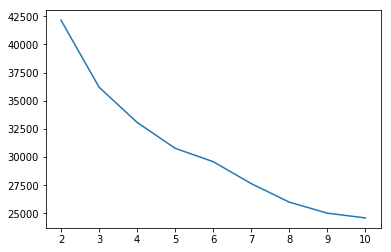

In [17]:
#Kmeans
inertia_list = []
for k in range(2,11):
    kmn = KMeans(n_clusters=k)
    kmn.fit(df1)
    inertia_list.append(kmn.inertia_)
print(inertia_list)
plt.plot(range(2,11),inertia_list)
plt.show()

In [18]:
kmn = KMeans(n_clusters=4)
kmn.fit(df1)
labels = kmn.predict(df1)
df['Kmeans-cluster'] = labels
df.head()

,Unnamed: 2,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),طول شبکه پلی اتیلن تحت پوشش (کیلومتر),تعداد ایستگاه CGS با ظرفیت 50000 و کمتر,تعداد ایستگاه CGS با ظرفیت بالای 50000,تعداد ایستگاه TBS,تعداد ایستگاه MRS,تعداد ایستگاه CGS-TBS,تعداد ایستگاه MS,تعداد ایستگاه CPS,تعداد TP,تعداد شیرهای شبکه توزیع و تغذیه,میزان پرتی گاز شبکه (مترمکعب),طول عمر شبکه (سال),تعداد روستاها و شهر های قابل گازرسانی,متراژ شبکه اجرا شده در سال 97,تعداد انشعابات نصب شده در سال 97,تعداد مشترک قطع گاز شده برنامه ریزی شده در یک سال,تعداد مشترک قطع گاز شده برنامه ریزی نشده در یک سال,میزان انتشار گاز گلخانه­ای,میزان تولید پسماند غیرخطرناک,میزان تولید پسماند خطرناک,میزان مصرف برق در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف آب در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف گاز در ساختمان های اداری و تأسیسات ادارات گاز,تعداد نشتی های گزارش شده زیر زمینی در سال 97,تعداد نشتی های گزارش شده فوقانی در سال 97,سرانه حوادث مصرف کنندگان,سرانه حوادث کارکنان (ناشی از کار),تعداد حوادث گزارش شده تاسیسات در سال,نسبت تماس با سامانه 194 به کل مشترک در سال,افت فشار خطوط انتقال,فاصله دورترین نقطه خدمات رسانی تا مرکز شهر (Km),فاصله شهر تا مرکز شهرستان (Km),ضریب منطقه ای فهرست بها ابلاغیه سازمان مدیریت,اقلیم بندی مناطق (مقدار 1 تا 5),تعداد مشترک صنعتی,تعداد مشترک عمومی,تعداد مشترک خانگی,درصد شکایات ثبت شده نسبت به تعداد مشترک (سال 97),میزان مطالبات معوق مشترکین صنعتی (میلیون ریال),میزان مطالبات معوق مشترکین عمومی (میلیون ریال),میزان مطالبات معوق مشترکین خانگی (میلیون ریال),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص),Unnamed: 54,Unnamed: 55,Unnamed: 56,Kmeans-cluster
1,تبریز,245.0,688.0,0.0,157.0,4.212152e+09,40.0,261.0,2025.00,529.0,1.0,6.0,72.0,163.0,3.0,264.0,62.0,1957.0,6846.0,2.077566e+08,30.0,3.0,27963.0,1607.0,16706.0,600.0,626040.582379,100.587298,1.287824,149290.0,4437.0,572585.0,434.0,1028.0,0.00107,0.0,48.0,6.70,0.0,45.0,0.0,1.00,1.0,1688.0,15077.0,595999.0,0.007910,718710.0,346393.0,377674.0,5.124021e+06,1164.989183,NaN,NaN,NaN,3
2,سردرود,3.0,12.0,0.0,2.0,6.266862e+07,5.0,21.0,80.00,95.0,1.0,0.0,5.0,16.0,0.0,22.0,4.0,100.0,520.0,2.960165e+06,22.0,0.0,7544.0,218.0,3300.0,270.0,NaN,37.006883,0.000000,3494.0,163.0,11830.0,18.0,40.0,0.00020,0.0,7.0,17.14,0.0,15.0,15.0,1.03,1.0,114.0,5257.0,19452.0,0.008013,1968.0,15993.0,13148.0,7.920335e+04,1263.843810,NaN,NaN,NaN,0
3,خسروشاه,2.0,14.0,0.0,4.0,9.958995e+07,12.0,29.0,124.00,150.0,1.0,0.0,9.0,25.0,0.0,42.0,4.0,174.0,730.0,4.704152e+06,16.0,0.0,8811.0,200.0,7345.0,500.0,NaN,185.259409,1.666667,2986.0,185.0,15127.0,47.0,132.0,0.00011,0.0,0.0,0.00,0.0,20.0,20.0,1.03,1.0,486.0,2690.0,15103.0,0.005454,20647.0,36378.0,11328.0,1.171183e+05,1176.005211,NaN,NaN,NaN,0
4,باسمنج,2.0,14.0,0.0,2.0,5.952896e+07,13.0,20.0,112.00,147.0,0.0,1.0,4.0,1.0,0.0,0.0,3.0,135.0,570.0,2.811863e+06,22.0,0.0,10159.0,280.0,1500.0,1000.0,NaN,38.989395,0.000000,8704.0,360.0,14471.0,28.0,81.0,0.00013,0.0,46.0,0.04,0.0,25.0,20.0,1.03,1.0,175.0,3761.0,18295.0,0.008802,11363.0,20250.0,21338.0,7.505892e+04,1260.880739,NaN,NaN,NaN,0
5,ممقان,1.0,7.0,0.0,6.0,1.386572e+08,1.0,17.4,0.86,55.8,1.0,0.0,0.0,12.0,3.0,88.0,2.0,21.0,386.0,1.856375e+07,19.0,0.0,3122.0,69.0,282.0,0.0,NaN,120.087336,0.000000,5141.0,146.0,5519.0,16.0,35.0,0.00028,0.0,2.0,0.07,0.0,3.0,7.0,1.03,1.0,1856.0,90.0,4504.0,0.028450,203928.0,684.0,8613.0,1.824766e+05,1316.026963,NaN,NaN,NaN,0


In [12]:
#Meanshift
clustering = MeanShift().fit(df1)
df['meanshift'] = clustering.labels_

In [13]:
#spectral
spec=SpectralClustering()
clusterspec=spec.fit_predict(df1)
df['spectral']=clusterspec

C:\Users\Ahmad\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [14]:
#agglomerative
agge = AgglomerativeClustering(n_clusters=5)
agge = agge.fit_predict(df1)
df['agglomerative'] = agge

In [15]:
#DBSCAN
DBS = DBSCAN()
dbc = DBS.fit_predict(df1)
df['DBSCAN'] = dbc

In [18]:
df.head()

,Unnamed: 2,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مدت معین,قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),...,حجم فروش در سال 97 (میلیون متر مکعب),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص),نرخ گازبها بر اساس حجم فروش,بهای تمام شده گاز فروش رقته (ريال),Kmeans-cluster,meanshift,spectral,agglomerative,DBSCAN
1,تبریز,245.0,688.0,0.0,4.0,157.0,4.398343e+09,40.0,261.0,2025.00,...,4371.428084,5.124021e+06,6.987696e+06,1172.161908,310.0,2,1,7,3,-1
2,سردرود,3.0,12.0,0.0,0.0,2.0,6.266862e+07,5.0,21.0,80.00,...,65.513460,7.920335e+04,3.173211e+06,1208.962976,374.0,0,0,7,0,-1
3,خسروشاه,2.0,14.0,0.0,0.0,4.0,9.958995e+07,12.0,29.0,124.00,...,101.215639,1.171183e+05,6.388038e+06,1157.116593,318.0,0,0,7,0,-1
4,باسمنج,2.0,14.0,0.0,0.0,2.0,5.952896e+07,13.0,20.0,112.00,...,62.810453,7.505892e+04,3.303504e+06,1195.006785,451.0,0,0,7,0,-1
5,ممقان,1.0,7.0,0.0,0.0,6.0,1.386572e+08,1.0,17.4,0.86,...,121.956067,1.824766e+05,2.595684e+07,1496.248364,262.0,0,8,7,0,-1


In [ ]:
df.to_excel('cluster.xlsx')

In [36]:
#feature Important
dfb = notnull.fit_transform(dfb)
minmax = MinMaxScaler()
dfb = minmax.fit_transform(dfb)
dfb = pd.DataFrame(dfb)
ch2 = SelectPercentile(chi2,20)
imp = ch2.fit_transform(dfb,labels)
pd.DataFrame(imp).head()

,0,1,2,3,4,5,6,7,8,9
0,0.777778,0.839572,0.144376,0.231376,0.070675,0.109901,0.207039,0.359314,0.123542,0.241822
1,0.009524,0.010695,0.014172,0.019281,0.013961,0.004558,0.072190,0.011727,0.005704,0.008419
2,0.006349,0.021390,0.022143,0.036810,0.031073,0.011902,0.036939,0.009105,0.012974,0.007253
3,0.006349,0.010695,0.000886,0.000000,0.006346,0.007090,0.051646,0.011030,0.007222,0.013663
4,0.003175,0.032086,0.010629,0.077125,0.001193,0.004052,0.001236,0.002715,0.000244,0.005515


In [41]:
df2 = d.iloc[1:,:-5]

In [42]:
df2

,سنجه,Unnamed: 1,Unnamed: 2,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),طول شبکه پلی اتیلن تحت پوشش (کیلومتر),تعداد ایستگاه CGS با ظرفیت 50000 و کمتر,تعداد ایستگاه CGS با ظرفیت بالای 50000,تعداد ایستگاه TBS,تعداد ایستگاه MRS,تعداد ایستگاه CGS-TBS,تعداد ایستگاه MS,تعداد ایستگاه CPS,تعداد TP,تعداد شیرهای شبکه توزیع و تغذیه,میزان پرتی گاز شبکه (مترمکعب),طول عمر شبکه (سال),تعداد روستاها و شهر های قابل گازرسانی,متراژ شبکه اجرا شده در سال 97,تعداد انشعابات نصب شده در سال 97,تعداد مشترک قطع گاز شده برنامه ریزی شده در یک سال,تعداد مشترک قطع گاز شده برنامه ریزی نشده در یک سال,میزان انتشار گاز گلخانه­ای,میزان تولید پسماند غیرخطرناک,میزان تولید پسماند خطرناک,میزان مصرف برق در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف آب در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف گاز در ساختمان های اداری و تأسیسات ادارات گاز,تعداد نشتی های گزارش شده زیر زمینی در سال 97,تعداد نشتی های گزارش شده فوقانی در سال 97,سرانه حوادث مصرف کنندگان,سرانه حوادث کارکنان (ناشی از کار),تعداد حوادث گزارش شده تاسیسات در سال,نسبت تماس با سامانه 194 به کل مشترک در سال,افت فشار خطوط انتقال,فاصله دورترین نقطه خدمات رسانی تا مرکز شهر (Km),فاصله شهر تا مرکز شهرستان (Km),ضریب منطقه ای فهرست بها ابلاغیه سازمان مدیریت,اقلیم بندی مناطق (مقدار 1 تا 5),تعداد مشترک صنعتی,تعداد مشترک عمومی,تعداد مشترک خانگی,درصد شکایات ثبت شده نسبت به تعداد مشترک (سال 97),میزان مطالبات معوق مشترکین صنعتی (میلیون ریال),میزان مطالبات معوق مشترکین عمومی (میلیون ریال),میزان مطالبات معوق مشترکین خانگی (میلیون ریال),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص)
1,آذربايجان شرقي,تبریز,تبریز,245.0,688.0,0.0,157.0,4.212152e+09,40.0,261.00000,2025.00000,529.000,1.0,6.0,72.0,163.0,3.0,264.0,62.0,1957.0,6846.0,2.077566e+08,30.0,3.0,27963.000,1607.0,16706.0,600.0,626040.582379,100.587298,1.287824,149290.0,4437.0,572585.0,434.0,1028.0,0.001070,0.00,48.0,6.700,0.0,45.0,0.0,1.00,1.0,1688.0,15077.0,595999.0,0.007910,718710.000000,346393.000000,377674.000000,5.124021e+06,1164.989183
2,NaN,NaN,سردرود,3.0,12.0,0.0,2.0,6.266862e+07,5.0,21.00000,80.00000,95.000,1.0,0.0,5.0,16.0,0.0,22.0,4.0,100.0,520.0,2.960165e+06,22.0,0.0,7544.000,218.0,3300.0,270.0,NaN,37.006883,0.000000,3494.0,163.0,11830.0,18.0,40.0,0.000200,0.00,7.0,17.140,0.0,15.0,15.0,1.03,1.0,114.0,5257.0,19452.0,0.008013,1968.000000,15993.000000,13148.000000,7.920335e+04,1263.843810
3,NaN,NaN,خسروشاه,2.0,14.0,0.0,4.0,9.958995e+07,12.0,29.00000,124.00000,150.000,1.0,0.0,9.0,25.0,0.0,42.0,4.0,174.0,730.0,4.704152e+06,16.0,0.0,8811.000,200.0,7345.0,500.0,NaN,185.259409,1.666667,2986.0,185.0,15127.0,47.0,132.0,0.000110,0.00,0.0,0.000,0.0,20.0,20.0,1.03,1.0,486.0,2690.0,15103.0,0.005454,20647.000000,36378.000000,11328.000000,1.171183e+05,1176.005211
4,NaN,NaN,باسمنج,2.0,14.0,0.0,2.0,5.952896e+07,13.0,20.00000,112.00000,147.000,0.0,1.0,4.0,1.0,0.0,0.0,3.0,135.0,570.0,2.811863e+06,22.0,0.0,10159.000,280.0,1500.0,1000.0,NaN,38.989395,0.000000,8704.0,360.0,14471.0,28.0,81.0,0.000130,0.00,46.0,0.040,0.0,25.0,20.0,1.03,1.0,175.0,3761.0,18295.0,0.008802,11363.000000,20250.000000,21338.000000,7.505892e+04,1260.880739
5,NaN,آذرشهر,ممقان,1.0,7.0,0.0,6.0,1.386572e+08,1.0,17.40000,0.86000,55.800,1.0,0.0,0.0,12.0,3.0,88.0,2.0,21.0,386.0,1.856375e+07,19.0,0.0,3122.000,69.0,282.0,0.0,NaN,120.087336,0.000000,5141.0,146.0,5519.0,16.0,35.0,0.000280,0.00,2.0,0.070,0.0,3.0,7.0,1.03,1.0,1856.0,90.0,4504.0,0.028450,203928.000000,684.000000,8613.000000,1.824766e+05,1316.026963
6,NaN,NaN,گوگان,2.0,9.0,0.0,1.0,3.246786e+07,8.0,4.70000,3.00000,112.300,0.0,0.0,1.0,0.0,0.0,3.0,1.0,13.0,193.0,4.346875e+06,20.0,0.0,3338.000,110.0,410.0,271.0,NaN,53.445961,0.000000,2490.0,121.0,6160.0,13.0,28.0,0.000360,0.00,7.0,0.100,0.0,5.0,6.0,1.03,1.0,42.0,64.0,9483.0,0.009098,21.000000,651.000000,21022.000000,3.706036e+04,1141.447500
7,NaN,NaN,آذرشهر,5.0,21.0,0.0,5.0,1.233670e+08,27.0,31.00000,101.00000,246.000,1.0,0

In [50]:
df1.columns= dfb.columns

In [51]:
df1.head()

,رسمی,پیمانکاری (حجمی و غیر حجمی),مشاور (نظارت),قرارداد مستقیم,میزان گاز مصرفی در سال (متر مکعب),تعداد شهرها و روستاهای تحت پوشش,طول خط تغذیه (کیلومتر),طول شبکه توزیع فولادی تحت پوشش (کیلومتر),طول شبکه پلی اتیلن تحت پوشش (کیلومتر),تعداد ایستگاه CGS با ظرفیت 50000 و کمتر,تعداد ایستگاه CGS با ظرفیت بالای 50000,تعداد ایستگاه TBS,تعداد ایستگاه MRS,تعداد ایستگاه CGS-TBS,تعداد ایستگاه MS,تعداد ایستگاه CPS,تعداد TP,تعداد شیرهای شبکه توزیع و تغذیه,میزان پرتی گاز شبکه (مترمکعب),طول عمر شبکه (سال),تعداد روستاها و شهر های قابل گازرسانی,متراژ شبکه اجرا شده در سال 97,تعداد انشعابات نصب شده در سال 97,تعداد مشترک قطع گاز شده برنامه ریزی شده در یک سال,تعداد مشترک قطع گاز شده برنامه ریزی نشده در یک سال,میزان انتشار گاز گلخانه­ای,میزان تولید پسماند غیرخطرناک,میزان تولید پسماند خطرناک,میزان مصرف برق در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف آب در ساختمان های اداری و تأسیسات ادارات گاز,میزان مصرف گاز در ساختمان های اداری و تأسیسات ادارات گاز,تعداد نشتی های گزارش شده زیر زمینی در سال 97,تعداد نشتی های گزارش شده فوقانی در سال 97,سرانه حوادث مصرف کنندگان,سرانه حوادث کارکنان (ناشی از کار),تعداد حوادث گزارش شده تاسیسات در سال,نسبت تماس با سامانه 194 به کل مشترک در سال,افت فشار خطوط انتقال,فاصله دورترین نقطه خدمات رسانی تا مرکز شهر (Km),فاصله شهر تا مرکز شهرستان (Km),ضریب منطقه ای فهرست بها ابلاغیه سازمان مدیریت,اقلیم بندی مناطق (مقدار 1 تا 5),تعداد مشترک صنعتی,تعداد مشترک عمومی,تعداد مشترک خانگی,درصد شکایات ثبت شده نسبت به تعداد مشترک (سال 97),میزان مطالبات معوق مشترکین صنعتی (میلیون ریال),میزان مطالبات معوق مشترکین عمومی (میلیون ریال),میزان مطالبات معوق مشترکین خانگی (میلیون ریال),مبلغ ریالی فروش در سال 97 (میلیون ریال),نرخ متوسط گازبها (بر اساس شناسنامه شاخص)
0,10.518339,13.361923,-0.20406,11.522402,5.092603,0.263582,-0.098374,1.460124,-0.109314,0.109237,8.006127,4.460790,3.811415,1.902782,5.110780,6.398823,3.744878,5.387908,-0.019181,0.974642,-0.478236,0.043908,1.769195,1.620066,-0.041961,8.390525,-0.031603,-0.111264,-0.029915,-0.037972,0.073079,2.804129,-0.041924,-0.114615,-0.082523,3.058626,-0.170780,-0.267244,-0.012052,-0.646399,-0.056739,-1.009404,5.944866,3.565698,7.784558,-0.093221,1.988012,3.722179,6.457258,3.254755,-0.025335
1,-0.098646,-0.177341,-0.20406,-0.165596,-0.146808,-0.654088,-0.110618,-0.036864,-0.116394,0.109237,-0.291655,-0.126494,0.228145,-0.501484,0.194406,0.049210,-0.072988,0.058807,-0.031579,0.426351,-0.539649,-0.114285,-0.121418,0.149435,-0.178094,-0.044788,-0.031607,-0.112786,-0.032026,-0.038253,-0.033024,-0.085824,-0.212543,-0.114635,-0.082523,0.176111,-0.165098,-0.267244,-0.056446,-0.257816,0.019676,-1.009404,0.098934,1.046313,0.011158,-0.093205,-0.114544,0.073232,0.016519,-0.070431,-0.008380
2,-0.142518,-0.137284,-0.20406,-0.014783,-0.100189,-0.470554,-0.110210,-0.002999,-0.115497,0.109237,-0.291655,0.147373,0.447529,-0.501484,0.600718,0.049210,0.079151,0.235714,-0.031474,0.015132,-0.539649,-0.104469,-0.145918,0.593169,-0.083214,-0.044788,-0.031598,-0.110817,-0.032034,-0.038251,-0.032401,0.115639,-0.196655,-0.114637,-0.082523,-0.316026,-0.174426,-0.267244,-0.049047,-0.128289,0.019676,-1.009404,1.480564,0.387732,-0.047478,-0.093598,-0.059749,0.298364,-0.015638,-0.045441,-0.023446
3,-0.142518,-0.137284,-0.20406,-0.165596,-0.150772,-0.444334,-0.110669,-0.012235,-0.115546,-0.817903,1.091309,-0.194961,-0.137495,-0.501484,-0.252537,-0.060266,-0.001030,0.100928,-0.031588,0.426351,-0.539649,-0.094026,-0.037027,-0.048024,0.123048,-0.044788,-0.031607,-0.112786,-0.031951,-0.038240,-0.032525,-0.016354,-0.205462,-0.114637,-0.082523,2.918016,-0.174404,-0.267244,-0.041648,-0.128289,0.019676,-1.009404,0.325491,0.662504,-0.004441,-0.093084,-0.086983,0.120246,0.161227,-0.073163,-0.008888
4,-0.186390,-0.277484,-0.20406,0.136030,-0.050860,-0.758964,-0.110801,-0.097775,-0.117034,0.109237,-0.291655,-0.468829,0.130641,1.902782,1.535235,-0.169742,-0.235406,-0.054076,-0.030635,0.220742,-0.539649,-0.148544,-0.324226,-0.181638,-0.289475,-0.044788,-0.031602,-0.112786,-0.032002,-0.038254,-0.034219,-0.099718,-0.213406,-0.114633,-0.082523,

In [52]:
df1.to_excel('file10.xlsx')